# 1. Load data from database

In [153]:
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns

In [154]:
# create sql query for getting full data from financial reports
query = """SELECT
    pnl.ticker AS Ticker,
    pnl.type AS Type,
    pnl.fiscalDateEnding AS Fiscal_Date_Ending,
    pnl.grossProfit AS Gross_Profit,
    pnl.totalRevenue AS Total_Revenue,
    pnl.costOfRevenue AS Cost_Of_Revenue,
    pnl.costofGoodsAndServicesSold AS Cost_of_Goods_And_Services_Sold,
    pnl.operatingIncome AS Operating_Income,
    pnl.sellingGeneralAndAdministrative AS Selling_General_And_Administrative,
    pnl.researchAndDevelopment AS Research_And_Development,
    pnl.operatingExpenses AS Operating_Expenses,
    pnl.investmentIncomeNet AS Investment_Income_Net,
    pnl.netInterestIncome AS Net_Interest_Income,
    pnl.interestIncome AS Interest_Income,
    pnl.interestExpense AS Interest_Expense,
    pnl.nonInterestIncome AS Non_Interest_Income,
    pnl.otherNonOperatingIncome AS Other_Non_Operating_Income,
    pnl.depreciation AS Depreciation,
    pnl.depreciationAndAmortization AS Depreciation_And_Amortization,
    pnl.incomeBeforeTax AS Income_Before_Tax,
    pnl.incomeTaxExpense AS Income_Tax_Expense,
    pnl.interestAndDebtExpense AS Interest_And_Debt_Expense,
    pnl.netIncomeFromContinuingOperations AS Net_Income_From_Continuing_Operations,
    pnl.comprehensiveIncomeNetOfTax AS Comprehensive_Income_Net_Of_Tax,
    pnl.ebit AS EBIT,
    pnl.ebitda AS EBITDA,
    pnl.netIncome AS Net_Income,
    balance_sheet.totalAssets AS Total_Assets,
    balance_sheet.totalCurrentAssets AS Total_Current_Assets,
    balance_sheet.cashAndCashEquivalentsAtCarryingValue AS Cash_And_Cash_Equivalents_At_Carrying_Value,
    balance_sheet.cashAndShortTermInvestments AS Cash_And_Short_Term_Investments,
    balance_sheet.inventory AS Inventory,
    balance_sheet.currentNetReceivables AS Current_Net_Receivables,
    balance_sheet.totalNonCurrentAssets AS Total_Non_Current_Assets,
    balance_sheet.propertyPlantEquipment AS Property_Plant_Equipment,
    balance_sheet.accumulatedDepreciationAmortizationPPE AS Accumulated_Depreciation_Amortization_PPE,
    balance_sheet.intangibleAssets AS Intangible_Assets,
    balance_sheet.intangibleAssetsExcludingGoodwill AS Intangible_Assets_Excluding_Goodwill,
    balance_sheet.goodwill AS Goodwill,
    balance_sheet.investments AS Investments,
    balance_sheet.longTermInvestments AS Long_Term_Investments,
    balance_sheet.shortTermInvestments AS Short_Term_Investments,
    balance_sheet.otherCurrentAssets AS Other_Current_Assets,
    balance_sheet.otherNonCurrentAssets AS Other_Non_Current_Assets,
    balance_sheet.totalLiabilities AS Total_Liabilities,
    balance_sheet.totalCurrentLiabilities AS Total_Current_Liabilities,
    balance_sheet.currentAccountsPayable AS Current_Accounts_Payable,
    balance_sheet.deferredRevenue AS Deferred_Revenue,
    balance_sheet.currentDebt AS Current_Debt,
    balance_sheet.shortTermDebt AS Short_Term_Debt,
    balance_sheet.totalNonCurrentLiabilities AS Total_Non_Current_Liabilities,
    balance_sheet.capitalLeaseObligations AS Capital_Lease_Obligations,
    balance_sheet.longTermDebt AS Long_Term_Debt,
    balance_sheet.currentLongTermDebt AS Current_Long_Term_Debt,
    balance_sheet.longTermDebtNoncurrent AS Long_Term_Debt_Noncurrent,
    balance_sheet.shortLongTermDebtTotal AS Short_Long_Term_Debt_Total,
    balance_sheet.otherCurrentLiabilities AS Other_Current_Liabilities,
    balance_sheet.otherNonCurrentLiabilities AS Other_Non_Current_Liabilities,
    balance_sheet.totalShareholderEquity AS Total_Shareholder_Equity,
    balance_sheet.treasuryStock AS Treasury_Stock,
    balance_sheet.retainedEarnings AS Retained_Earnings,
    balance_sheet.commonStock AS Common_Stock,
    balance_sheet.commonStockSharesOutstanding AS Common_Stock_Shares_Outstanding,
    cash_flow.operatingCashflow AS Operating_Cashflow,
    cash_flow.paymentsForOperatingActivities AS Payments_For_Operating_Activities,
    cash_flow.proceedsFromOperatingActivities AS Proceeds_From_Operating_Activities,
    cash_flow.changeInOperatingLiabilities AS Change_In_Operating_Liabilities,
    cash_flow.changeInOperatingAssets AS Change_In_Operating_Assets,
    cash_flow.depreciationDepletionAndAmortization AS Depreciation_Depletion_And_Amortization,
    cash_flow.capitalExpenditures AS Capital_Expenditures,
    cash_flow.changeInReceivables AS Change_In_Receivables,
    cash_flow.changeInInventory AS Change_In_Inventory,
    cash_flow.profitLoss AS Profit_Loss,
    cash_flow.cashflowFromInvestment AS Cashflow_From_Investment,
    cash_flow.cashflowFromFinancing AS Cashflow_From_Financing,
    cash_flow.proceedsFromRepaymentsOfShortTermDebt AS Proceeds_From_Repayments_Of_Short_Term_Debt,
    cash_flow.paymentsForRepurchaseOfCommonStock AS Payments_For_Repurchase_Of_Common_Stock,
    cash_flow.paymentsForRepurchaseOfEquity AS Payments_For_Repurchase_Of_Equity,
    cash_flow.paymentsForRepurchaseOfPreferredStock AS Payments_For_Repurchase_Of_Preferred_Stock,
    cash_flow.dividendPayout AS Dividend_Payout,
    cash_flow.dividendPayoutCommonStock AS Dividend_Payout_Common_Stock,
    cash_flow.dividendPayoutPreferredStock AS Dividend_Payout_Preferred_Stock,
    cash_flow.proceedsFromIssuanceOfCommonStock AS Proceeds_From_Issuance_Of_Common_Stock,
    cash_flow.proceedsFromIssuanceOfLongTermDebtAndCapitalSecuritiesNet AS Proceeds_From_Issuance_Of_Long_Term_Debt_And_Capital_Securities_Net,
    cash_flow.proceedsFromIssuanceOfPreferredStock AS Proceeds_From_Issuance_Of_Preferred_Stock,
    cash_flow.proceedsFromRepurchaseOfEquity AS Proceeds_From_Repurchase_Of_Equity,
    cash_flow.proceedsFromSaleOfTreasuryStock AS Proceeds_From_Sale_Of_Treasury_Stock,
    cash_flow.changeInCashAndCashEquivalents AS Change_In_Cash_And_Cash_Equivalents,
    cash_flow.changeInExchangeRate AS Change_In_Exchange_Rate,
    cash_flow.netIncome AS Net_Income
FROM pnl
LEFT JOIN balance_sheet
    ON pnl.ticker = balance_sheet.ticker
    AND pnl.type = balance_sheet.type
    AND pnl.fiscalDateEnding = balance_sheet.fiscalDateEnding
LEFT JOIN cash_flow
    ON pnl.ticker = cash_flow.ticker
    AND pnl.type = cash_flow.type
    AND pnl.fiscalDateEnding = cash_flow.fiscalDateEnding
WHERE pnl.type = 'quarterly';
"""

In [155]:
# load data as dataframe
conn = None
df = None
try:
    conn = sqlite3.connect('/Users/pavel/PycharmProjects/stock-market-app/src/financial_data.db')
    df = pd.read_sql_query(query, conn)
    conn.close()
except sqlite3.Error as e:
        print(f"An error occurred: {e}")

finally:
        if conn:
            conn.close()

# 2. Creating features set 

In [156]:
# Show all columns
for column in df.columns:
    print(column)

Ticker
Type
Fiscal_Date_Ending
Gross_Profit
Total_Revenue
Cost_Of_Revenue
Cost_of_Goods_And_Services_Sold
Operating_Income
Selling_General_And_Administrative
Research_And_Development
Operating_Expenses
Investment_Income_Net
Net_Interest_Income
Interest_Income
Interest_Expense
Non_Interest_Income
Other_Non_Operating_Income
Depreciation
Depreciation_And_Amortization
Income_Before_Tax
Income_Tax_Expense
Interest_And_Debt_Expense
Net_Income_From_Continuing_Operations
Comprehensive_Income_Net_Of_Tax
EBIT
EBITDA
Net_Income
Total_Assets
Total_Current_Assets
Cash_And_Cash_Equivalents_At_Carrying_Value
Cash_And_Short_Term_Investments
Inventory
Current_Net_Receivables
Total_Non_Current_Assets
Property_Plant_Equipment
Accumulated_Depreciation_Amortization_PPE
Intangible_Assets
Intangible_Assets_Excluding_Goodwill
Goodwill
Investments
Long_Term_Investments
Short_Term_Investments
Other_Current_Assets
Other_Non_Current_Assets
Total_Liabilities
Total_Current_Liabilities
Current_Accounts_Payable
Defer

In [157]:
# Creating features 
new_df = df[['Ticker', 'Fiscal_Date_Ending', 'Total_Revenue', 'EBITDA', 'Net_Income']]

new_df.loc[:, 'Total_Revenue_Ratio_Y_to_Y'] = 0.0
new_df.loc[:, 'Total_Revenue_Ratio_Q_to_Q'] = 0.0
new_df.loc[:, 'EBITDA_Ratio_Y_to_Y'] = 0.0
new_df.loc[:, 'EBITDA_Ratio_Q_to_Q'] = 0.0
new_df.loc[:, 'Net_Income_Ratio_Y_to_Y'] = 0.0
new_df.loc[:, 'Net_Income_Ratio_Q_to_Q'] = 0.0

for i in range(len(new_df)):
    current_date = pd.to_datetime(new_df.loc[i, 'Fiscal_Date_Ending'])
    prev_year_date = pd.Timestamp(current_date.year - 1, current_date.month, current_date.day)
    
    # Count Total_Revenue_Ratio_Y_to_Y и Total_Revenue_Ratio_Q_to_Q
    prev_year_revenue = new_df.loc[(new_df['Ticker'] == new_df.loc[i, 'Ticker']) & (pd.to_datetime(new_df['Fiscal_Date_Ending']) == prev_year_date.strftime('%Y-%m-%d')), 'Total_Revenue'].values
    if prev_year_revenue.size > 0 and prev_year_revenue[0] != 0:
        new_df.loc[i, 'Total_Revenue_Ratio_Y_to_Y'] = (new_df.loc[i, 'Total_Revenue'] - prev_year_revenue[0]) / prev_year_revenue[0]
    
    if current_date.month == 3:
        prev_quarter_date = pd.Timestamp(current_date.year - 1, 12, 31)
    elif current_date.month == 6:
        prev_quarter_date = pd.Timestamp(current_date.year, 3, 31)
    elif current_date.month == 9:
        prev_quarter_date = pd.Timestamp(current_date.year, 6, 30)
    elif current_date.month == 12:
        prev_quarter_date = pd.Timestamp(current_date.year, 9, 30)
    prev_quarter_revenue = new_df.loc[(new_df['Ticker'] == new_df.loc[i, 'Ticker']) & (pd.to_datetime(new_df['Fiscal_Date_Ending']) == prev_quarter_date.strftime('%Y-%m-%d')), 'Total_Revenue'].values
    if prev_quarter_revenue.size > 0 and prev_quarter_revenue[0] != 0:
        new_df.loc[i, 'Total_Revenue_Ratio_Q_to_Q'] = (new_df.loc[i, 'Total_Revenue'] - prev_quarter_revenue[0]) / prev_quarter_revenue[0]
    
    # Count EBITDA_Ratio_Y_to_Y и EBITDA_Ratio_Q_to_Q
    prev_year_ebitda = new_df.loc[(new_df['Ticker'] == new_df.loc[i, 'Ticker']) & (pd.to_datetime(new_df['Fiscal_Date_Ending']) == prev_year_date.strftime('%Y-%m-%d')), 'EBITDA'].values
    if prev_year_ebitda.size > 0 and prev_year_ebitda[0] != 0:
        new_df.loc[i, 'EBITDA_Ratio_Y_to_Y'] = (new_df.loc[i, 'EBITDA'] - prev_year_ebitda[0]) / prev_year_ebitda[0]
    
    prev_quarter_ebitda = new_df.loc[(new_df['Ticker'] == new_df.loc[i, 'Ticker']) & (pd.to_datetime(new_df['Fiscal_Date_Ending']) == prev_quarter_date.strftime('%Y-%m-%d')), 'EBITDA'].values
    if prev_quarter_ebitda.size > 0 and prev_quarter_ebitda[0] != 0:
        new_df.loc[i, 'EBITDA_Ratio_Q_to_Q'] = (new_df.loc[i, 'EBITDA'] - prev_quarter_ebitda[0]) / prev_quarter_ebitda[0]

new_df = new_df.reset_index(drop=True)[['Ticker', 'Fiscal_Date_Ending', 'Total_Revenue_Ratio_Y_to_Y', 'Total_Revenue_Ratio_Q_to_Q', 'EBITDA_Ratio_Y_to_Y', 'EBITDA_Ratio_Q_to_Q']]

new_df

/var/folders/j7/bpk2y95s0x12x19c3ryr4v7r0000gn/T/ipykernel_57790/3505137588.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[:, 'Total_Revenue_Ratio_Y_to_Y'] = 0.0
/var/folders/j7/bpk2y95s0x12x19c3ryr4v7r0000gn/T/ipykernel_57790/3505137588.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[:, 'Total_Revenue_Ratio_Q_to_Q'] = 0.0
/var/folders/j7/bpk2y95s0x12x19c3ryr4v7r0000gn/T/ipykernel_57790/3505137588.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

,Ticker,Fiscal_Date_Ending,Total_Revenue_Ratio_Y_to_Y,Total_Revenue_Ratio_Q_to_Q,EBITDA_Ratio_Y_to_Y,EBITDA_Ratio_Q_to_Q
0,XOM,2024-03-31,-0.040213,-0.014951,-0.370203,-0.089209
1,XOM,2023-12-31,-0.116160,-0.070692,-0.335984,-0.139868
2,XOM,2023-09-30,-0.190149,0.094628,-0.512339,0.352096
3,XOM,2023-06-30,-0.283253,-0.042165,-0.620656,-0.405422
4,XOM,2023-03-31,-0.043492,-0.092896,0.552455,-0.039723
...,...,...,...,...,...,...
550,MPC,2011-03-31,0.335279,0.023461,-6.201005,0.812609
551,MPC,2010-12-31,0.000000,0.096622,0.000000,-0.156573
552,MPC,2010-09-30,0.000000,0.006458,0.000000,-0.234163
553,MPC,2010-06-30,0.000000,0.182084,0.000000,-5.442211


# 3. EDA

## 3.1. Missing Value Analysis

<Axes: >

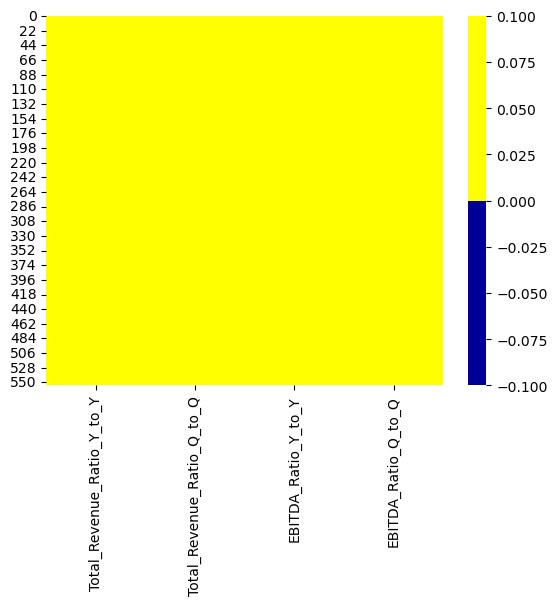

In [158]:
cols = ['Total_Revenue_Ratio_Y_to_Y', 'Total_Revenue_Ratio_Q_to_Q', 'EBITDA_Ratio_Y_to_Y', 'EBITDA_Ratio_Q_to_Q']
colours = ['#000099', '#ffff00']
sns.heatmap(new_df[cols].isnull(), cmap=sns.color_palette(colours))

## 3.2. Handle outliers

<Axes: >

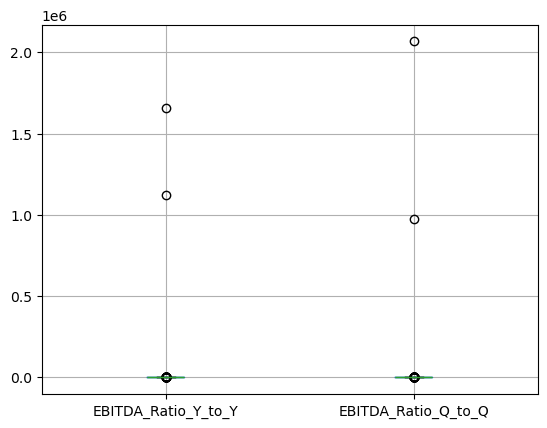

In [159]:
new_df.boxplot(column=['EBITDA_Ratio_Y_to_Y', 'EBITDA_Ratio_Q_to_Q'])

<Axes: >

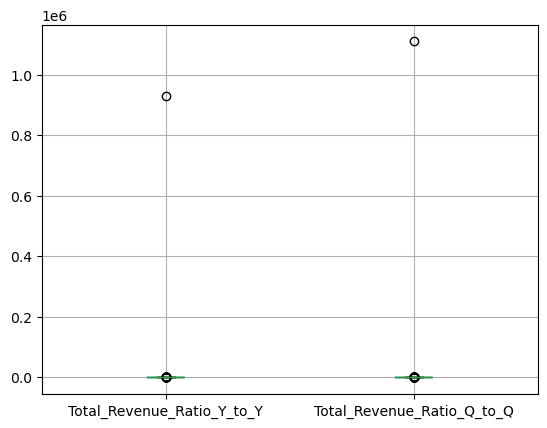

In [160]:
new_df.boxplot(column=['Total_Revenue_Ratio_Y_to_Y','Total_Revenue_Ratio_Q_to_Q'])

array([[<Axes: title={'center': 'Total_Revenue_Ratio_Y_to_Y'}>,
        <Axes: title={'center': 'Total_Revenue_Ratio_Q_to_Q'}>],
       [<Axes: title={'center': 'EBITDA_Ratio_Y_to_Y'}>,
        <Axes: title={'center': 'EBITDA_Ratio_Q_to_Q'}>]], dtype=object)

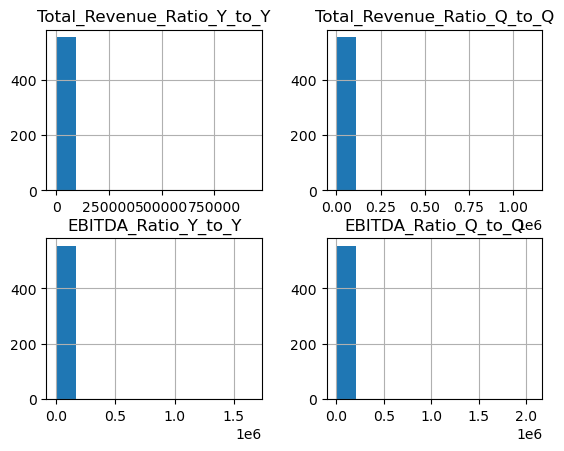

In [161]:
new_df.hist(column=['Total_Revenue_Ratio_Y_to_Y','Total_Revenue_Ratio_Q_to_Q', 'EBITDA_Ratio_Y_to_Y', 'EBITDA_Ratio_Q_to_Q'])

In [162]:
new_df.describe()

,Total_Revenue_Ratio_Y_to_Y,Total_Revenue_Ratio_Q_to_Q,EBITDA_Ratio_Y_to_Y,EBITDA_Ratio_Q_to_Q
count,555.000000,5.550000e+02,5.550000e+02,5.550000e+02
mean,1677.911386,2.004078e+03,4.998186e+03,5.484395e+03
std,39486.079395,4.712665e+04,8.472908e+04,9.697548e+04
min,-0.999999,-9.999990e-01,-2.936216e+01,-2.100811e+01
25%,-0.161169,-6.997093e-02,-2.944789e-01,-1.757664e-01
50%,0.000000,9.697631e-03,0.000000e+00,0.000000e+00
75%,0.225437,1.017361e-01,3.922076e-01,2.165431e-01
max,930231.911008,1.110233e+06,1.655002e+06,2.066994e+06


In [163]:
new_df[['Total_Revenue_Ratio_Y_to_Y','Total_Revenue_Ratio_Q_to_Q', 'EBITDA_Ratio_Y_to_Y', 'EBITDA_Ratio_Q_to_Q']].quantile([0.95, 0.05])

,Total_Revenue_Ratio_Y_to_Y,Total_Revenue_Ratio_Q_to_Q,EBITDA_Ratio_Y_to_Y,EBITDA_Ratio_Q_to_Q
0.95,0.826155,0.358737,1.912895,1.341308
0.05,-0.492550,-0.335699,-0.837473,-0.719771


In [164]:
# Deleting outliers
q95 = new_df[cols].quantile(0.95)
q5 = new_df[cols].quantile(0.05)

mask = True
for col in cols:
    mask &= (new_df[col] >= q5[col]) & (new_df[col] <= q95[col])

df_cleaned = new_df.loc[mask]

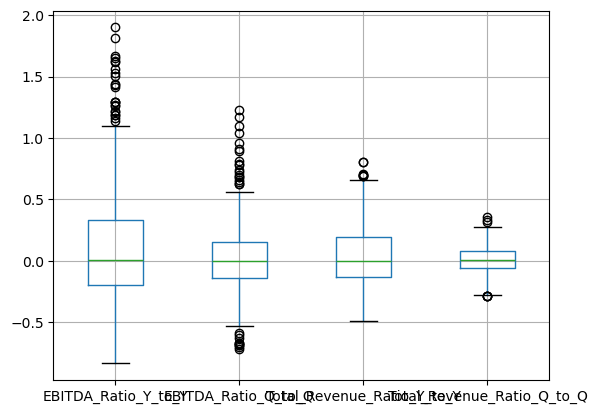

In [178]:
df_cleaned.boxplot(column=['EBITDA_Ratio_Y_to_Y', 'EBITDA_Ratio_Q_to_Q', 'Total_Revenue_Ratio_Y_to_Y','Total_Revenue_Ratio_Q_to_Q'])
plt.show()

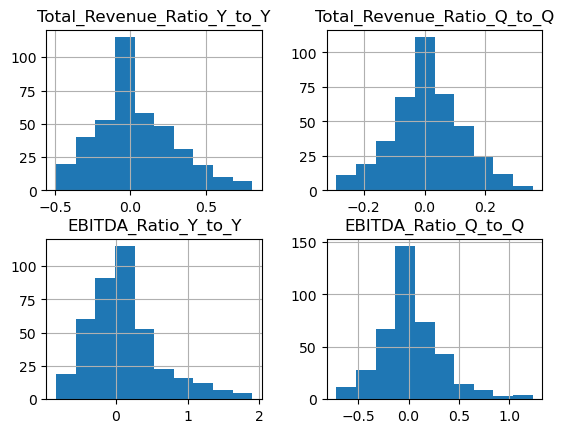

In [177]:
df_cleaned.hist(column=['Total_Revenue_Ratio_Y_to_Y','Total_Revenue_Ratio_Q_to_Q', 'EBITDA_Ratio_Y_to_Y', 'EBITDA_Ratio_Q_to_Q'])
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


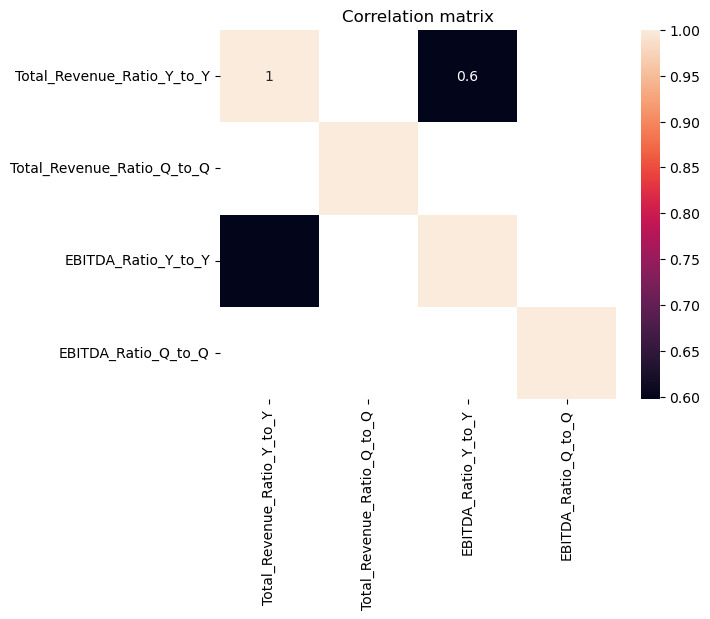

In [182]:
corr = df_cleaned[cols].corr()
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], annot=True)
plt.title("Correlation matrix")
plt.show()